In [1]:
# Import Numpy for calculations and matplotlib for charting
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from scipy import stats

In [2]:
# Read our data file the pandas library
file_path = Path("../Resources/Michigan_predictions_results.csv")
data = pd.read_csv(file_path)

file_path2 = Path("../Resources/proj_4_feat_target_var_set_update.csv")
data2 = pd.read_csv(file_path2)

# Display sample data

data2

,fips_code,state_id,state_name,high_tourist_border_sales,year,niaaa_pop_21_plus,census_total_pop,census_total_pop_21_plus,census_percent_pop_21_plus,census_percent_pop_18_24,...,bea_personal_income_dollars,bea_disp_inc_dollars,bea_percapita_personal_income_dollars,bea_percapita_disp_inc_dollars,census_median_household_inc_dollars,census_percent_pop_in_poverty_est,niaaa_total_beer_vol_consumed_gallons,niaaa_legal_adult_per_capita_beer_consumed_gallons,ba_craft_beer_produced_gallons,ba_legal_adult_per_capita_craft_beer_produced_gallons
0,1,AL,Alabama,0,2010,3439923,4785298,3426273,0.716,0.102,...,162068.8,148862.1,33849,31091,40474,0.172,101835000,29.60,NaN,NaN
1,2,AK,Alaska,1,2010,494781,713985,494078,0.692,0.105,...,35374.3,32703.9,49543,45803,64576,0.125,15476350,31.28,NaN,NaN
2,4,AZ,Arizona,0,2010,4496526,6413737,4502443,0.702,0.099,...,216223.6,198815.2,33774,31055,46789,0.188,140015325,31.14,NaN,NaN
3,5,AR,Arkansas,0,2010,2082760,2921606,2074340,0.710,0.100,...,94127.0,86387.0,32218,29569,38307,0.153,53429000,25.65,NaN,NaN
4,6,CA,California,0,2010,26311028,37349363,26293952,0.704,0.106,...,1609997.5,1431825.6,43138,38364,57708,0.163,651673303,24.77,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,51,VA,Virginia,0,2021,6412892,8642274,6395283,0.740,0.095,...,578639.7,499639.6,66838,57713,80963,0.098,151097751,23.56,14074350.0,2.19
608,53,WA,Washington,0,2021,5795889,7738692,5788542,0.748,0.086,...,574266.8,505590.1,74188,65315,84247,0.077,125364000,21.63,17599728.0,3.04
609,54,WV,West Virginia,0,2021,1358876,1782959,1351483,0.758,0.088,...,87617.4,79840.2,49071,44715,51248,0.169,38037000,27.99,733894.0,0.54
610,55,WI,Wisconsin,0,2021,4383656,5895908,4380660,0.743,0.092,...,355048.0,314662.1,60381,53513,67125,0.093,135005000,30.80,30531485.0,6.96


In [3]:
fips = 26
condition = data2['fips_code'] == fips
data2 = data2[condition]
data2

,fips_code,state_id,state_name,high_tourist_border_sales,year,niaaa_pop_21_plus,census_total_pop,census_total_pop_21_plus,census_percent_pop_21_plus,census_percent_pop_18_24,...,bea_personal_income_dollars,bea_disp_inc_dollars,bea_percapita_personal_income_dollars,bea_percapita_disp_inc_dollars,census_median_household_inc_dollars,census_percent_pop_in_poverty_est,niaaa_total_beer_vol_consumed_gallons,niaaa_legal_adult_per_capita_beer_consumed_gallons,ba_craft_beer_produced_gallons,ba_legal_adult_per_capita_craft_beer_produced_gallons
22,26,MI,Michigan,0,2010,7089538,9877574,7072343,0.7160,0.0980,...,352074.3,321080.3,35635,32498,45413,0.157,196593940,27.73,NaN,NaN
73,26,MI,Michigan,0,2011,7132733,9876187,7120731,0.7210,0.1010,...,372954.2,336072.2,37689,33962,45981,0.150,194106015,27.21,11060180.0,1.55
124,26,MI,Michigan,0,2012,7187502,9883360,7165436,0.7250,0.1010,...,387339.2,348254.6,39043,35104,46859,0.137,195288672,27.17,13589873.0,1.89
175,26,MI,Michigan,0,2013,7236934,9895622,7213908,0.7290,0.1020,...,390857.9,347736.1,39293,34958,48273,0.145,184789824,25.53,18070167.0,2.50
226,26,MI,Michigan,0,2014,7282231,9909877,7263940,0.7330,0.1010,...,407267.0,362554.6,40830,36348,49847,0.148,192738252,26.47,25578181.0,3.51
277,26,MI,Michigan,0,2015,7312497,9922576,7293093,0.7350,0.0990,...,429284.9,380285.6,42984,38078,51084,0.128,180825871,24.73,23866807.0,3.26
328,26,MI,Michigan,0,2016,7351721,9928300,7317157,0.7370,0.0980,...,441557.2,389478.1,44081,38882,52492,0.111,190290886,25.88,26226897.0,3.57
379,26,MI,Michigan,0,2017,7391332,9962311,7372110,0.7400,0.0970,...,454894.8,402996.6,45264,40100,54909,0.127,186716677,25.26,27093830.0,3.67
430,26,MI,Michigan,0,2018,7422235,9995915,7406973,0.7410,0.0960,...,474208.0,422585.8,47088,41962,56697,0.105,186165445,25.08,26970839.0,3.63
481,26,MI,Michigan,0,2019,7443390,9986857,7430222,0.7440,0.0950,...,489493.1,436361.6,48569,43297,59584,0.102,184718721,24.82,28133545.0,3.78


In [4]:
sample_data = data['Predicted_Value']

# Calculate sample statistics
sample_mean = sample_data.mean()
sample_std = sample_data.std()
sample_size = len(sample_data)

# Choose confidence level
confidence_level = 0.95

# Calculate critical value
critical_value = stats.t.ppf((1 + confidence_level) / 2, df=sample_size - 1)

# Calulate standard error
standard_error = sample_std / (sample_size ** 0.5)

# Calculate margin of error
margin_of_error = critical_value * standard_error

# Calculate lower and upper bounds
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

# Add lower and upper bounds to a new column in the DataFrame

data['Lower Bound'] = lower_bound
data['Upper Bound'] = upper_bound

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
data.head()

Lower Bound: 28.117600589458917
Upper Bound: 29.263626941031532


,Percentage,Predicted_Value,Lower Bound,Upper Bound
0,0.01,22.361579,28.117601,29.263627
1,0.02,22.361579,28.117601,29.263627
2,0.03,22.361579,28.117601,29.263627
3,0.04,22.361579,28.117601,29.263627
4,0.05,22.545458,28.117601,29.263627


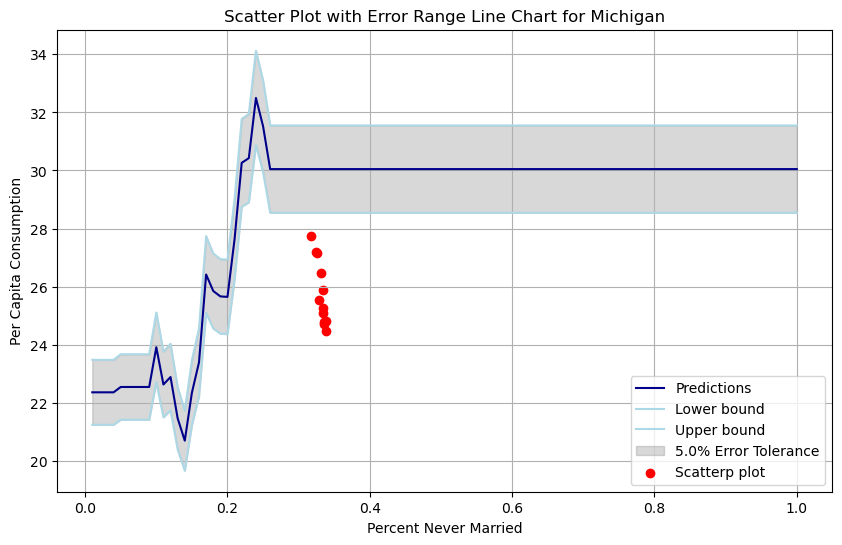

In [5]:
# Extract columns for X-axis, Y-axis, and error range bounds
x_values = data['Percentage']  # Replace 'X-axis' with the actual column name for X-axis data
y_values = data['Predicted_Value']  # Replace 'Y-axis' with the actual column name for Y-axis data

tolerance = 0.05
lowerY = data['Predicted_Value'] * (1 - tolerance)
upperY = data['Predicted_Value'] * (1 + tolerance)

# Plot the error range with the line graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Predictions', color = 'darkblue')
plt.plot(x_values, lowerY, label='Lower bound', color = 'lightblue')
plt.plot(x_values, upperY, label='Upper bound', color = 'lightblue')
plt.fill_between(x_values, lowerY, upperY, color='gray', alpha=0.3, label=f'{tolerance*100}% Error Tolerance')

scatterX = data2['census_percent_pop_never_married']
scatterY = data2['niaaa_legal_adult_per_capita_beer_consumed_gallons']

plt.scatter(scatterX, scatterY, label='Scatterp plot', color='red')

# Customize labels and title
plt.xlabel('Percent Never Married')
plt.ylabel('Per Capita Consumption')
plt.title('Scatter Plot with Error Range Line Chart for Michigan')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()